In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/golden-globe-awards/golden_globe_awards.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
data = pd.read_csv("../input/golden-globe-awards/golden_globe_awards.csv")

In [4]:
data.head()

,year_film,year_award,ceremony,category,nominee,film,win
0,1943,1944,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1,1943,1944,1,Best Performance by an Actor in a Supporting R...,Akim Tamiroff,For Whom The Bell Tolls,True
2,1943,1944,1,Best Director - Motion Picture,Henry King,The Song Of Bernadette,True
3,1943,1944,1,Picture,The Song Of Bernadette,NaN,True
4,1943,1944,1,Actress In A Leading Role,Jennifer Jones,The Song Of Bernadette,True


In [5]:
data.isnull().sum()

year_film        0
year_award       0
ceremony         0
category         0
nominee          0
film          1800
win              0
dtype: int64

In [6]:
data['win'].value_counts()

False    6166
True     1825
Name: win, dtype: int64

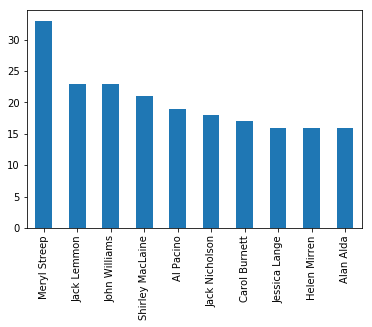

In [7]:
data["nominee"].value_counts().head(10).plot.bar()

In [8]:
data['category'].value_counts().head(20)

Best Performance by an Actress in a Supporting Role in any Motion Picture                                                360
Best Director - Motion Picture                                                                                           357
Best Performance by an Actor in a Supporting Role in any Motion Picture                                                  352
Best Motion Picture - Drama                                                                                              351
Best Performance by an Actor in a Motion Picture - Drama                                                                 344
Best Performance by an Actress in a Motion Picture - Drama                                                               342
Best Performance by an Actor in a Motion Picture - Musical or Comedy                                                     342
Best Original Score - Motion Picture                                                                                     320


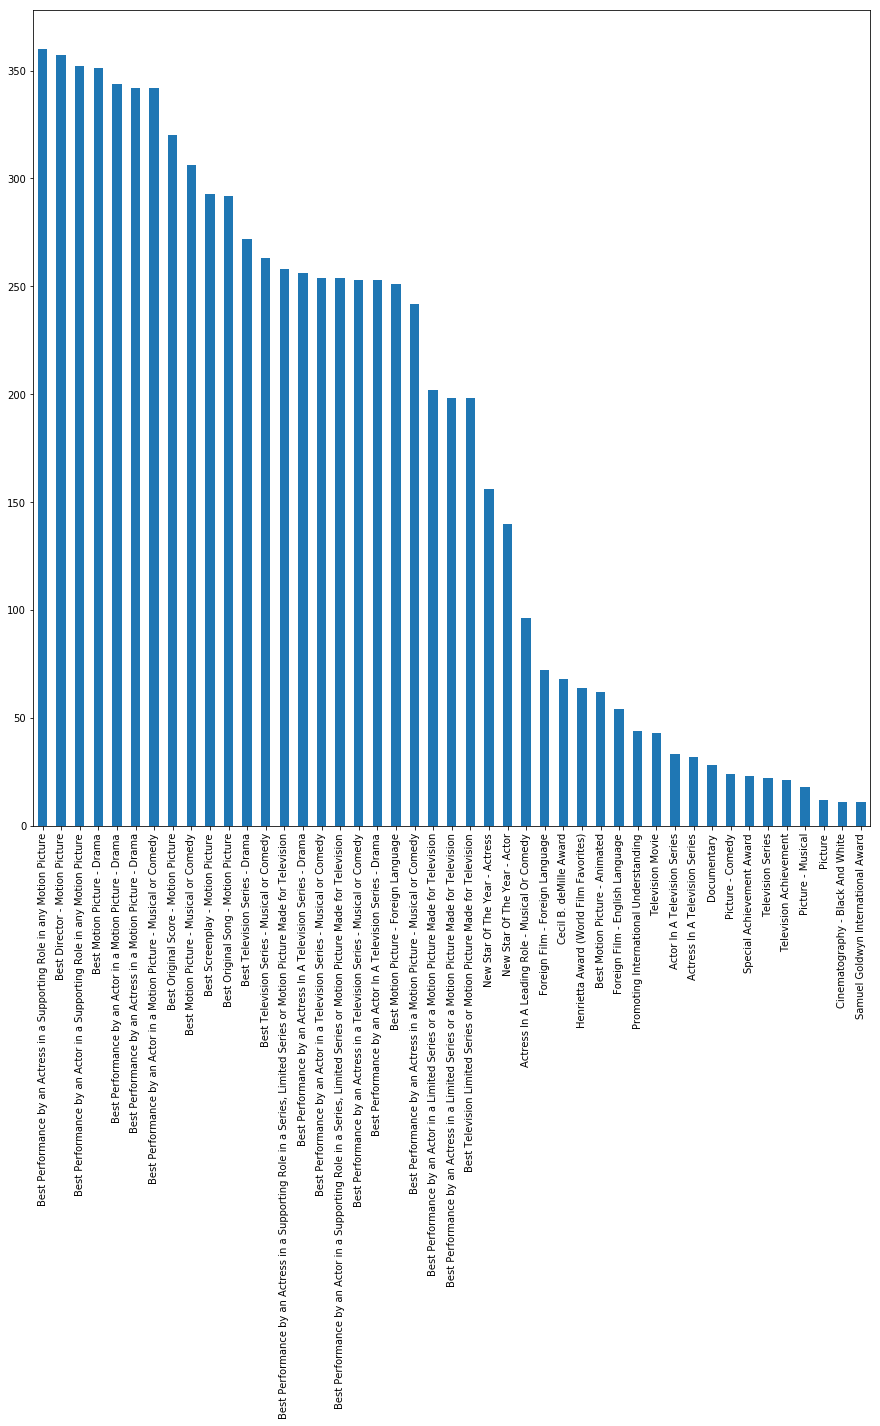

In [9]:
plt.figure(figsize=[15,15])
data["category"].value_counts().head(45).plot.bar()

In [10]:
group =data.groupby("year_award")
group.first()

,year_film,ceremony,category,nominee,film,win
year_award,,,,,,
1944,1943,1,Best Performance by an Actress in a Supporting...,Katina Paxinou,For Whom The Bell Tolls,True
1945,1944,2,Best Performance by an Actress in a Supporting...,Agnes Moorehead,Mrs. Parkington,True
1946,1945,3,Best Performance by an Actress in a Supporting...,Angela Lansbury,The Picture of Dorian Gray,True
1947,1946,4,Best Performance by an Actress in a Supporting...,Anne Baxter,The Razor's Edge,True
1948,1947,5,Best Performance by an Actress in a Supporting...,Celeste Holm,Gentleman's Agreement,True
...,...,...,...,...,...,...
2016,2015,73,Best Motion Picture - Drama,The Revenant,Room,True
2017,2016,74,Best Motion Picture - Drama,Moonlight,Elle,True
2018,2017,75,Best Motion Picture - Drama,"Three Billboards Outside Ebbing, Missouri","Three Billboards Outside Ebbing, Missouri",True


In [11]:
group2=data.groupby(["win","category"])

In [12]:
group2.first()

year_film  \
win   category                                                        
False Actor In A Leading Role                                  1949   
      Actor In A Leading Role - Drama Series Or Telev...       1971   
      Actor In A Leading Role - Musical Or Comedy Ser...       1971   
      Actor In A Supporting Role - Series Or Televisi...       1971   
      Actor In A Supporting Role - Television Series           1970   
...                                                             ...   
True  Television Program                                       1962   
      Television Series                                        1961   
      Television Series - Comedy                               1962   
      Television Series - Variety                              1963   
      Television Special - Variety Or Musical                  1972   

                                                          year_award  \
win   category                                                         
False Actor In A Leading Role                                   1950   
      Actor In A Leading Role - Drama Series Or Telev...        1972   
      Actor In A Leading Role - Musical Or Comedy Ser...        1972   
      Actor In A Supporting Role - Series Or Televisi...        1972   
      Actor In A Supporting Role - Television Series            1971   
...                                                              ...   
True  Television Program                                        1963   
      Television Series                                         1962   
      Television Series - Comedy                                1963   
      Television Series - Variety                               1964   
      Television Special - Variety Or Musical                   1973   

                                                          ceremony  \
win   category                                                       
False Actor In A Leading Role                                    7   
      Actor In A Leading Role - Drama Series Or Telev...        29   
      Actor In A Leading Role - Musical Or Comedy Ser...        29   
      Actor In A Supporting Role - Series Or Televisi...        29   
      Actor In A Supporting Role - Television Series            28   
...                                                            ...   
True  Television Program                                        20   
      Television Series                                         19   
      Television Series - Comedy                                20   
      Television Series - Variety                               21   
      Television Special - Variety Or Musical                   30   

                                                                                 nominee  \
win   category                                                                             
False Actor In A Leading Role                                               Richard Todd   
      Actor In A Leading Role - Drama Series Or Telev...                      Peter Falk   
      Actor In A Leading Role - Musical Or Comedy Ser...               Herschel Bernardi   
      Actor In A Supporting Role - Series Or Televisi...                    James Brolin   
      Actor In A Supporting Role - Television Series                         Zalman King   
...                                                                                  ...   
True  Television Program                                        Dick Powell Theatre, The   
      Television Series                                                    My Three Sons   
      Television Series - Comedy                                                  Mr. Ed   
      Television Series - Variety                                   Danny Kaye Show, The   
      Television Special - Variety Or Musical             Life of Leonardo Da Vinci, The   

                                                                        film  
win   cate

In [13]:
tag="Best Performance by an Actress in a Supporting Role in any Motion Picture"
data['relevent']=data["category"].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = data[data["relevent"]==1]
small[small['win']==True][["year_award","nominee","film","win"]].tail(20)

,year_award,nominee,film,win
5494,2001,Kate Hudson,Almost Famous,True
5621,2002,Jennifer Connelly,A Beautiful Mind,True
5752,2003,Meryl Streep,Adaptation,True
5880,2004,Renée Zellweger,Cold Mountain,True
6004,2005,Natalie Portman,Closer,True
6127,2006,Rachel Weisz,"Constant Gardener, The",True
6251,2007,Jennifer Hudson,Dreamgirls,True
6379,2008,Cate Blanchett,I'm Not There,True
6507,2009,Kate Winslet,"Reader, The",True
6631,2010,Mo'Nique,Precious: Based On The Novel Push By Sapphire,True


In [14]:
tag="Meryl Streep"
data['relevent']=data["nominee"].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = data[data["relevent"]==1]
small[small['win']==True][["year_award","nominee","film","win"]]

,year_award,nominee,film,win
2827,1980,Meryl Streep,Kramer vs. Kramer,True
3061,1982,Meryl Streep,"French Lieutenant's Woman, The",True
3191,1983,Meryl Streep,Sophie's Choice,True
5752,2003,Meryl Streep,Adaptation,True
5931,2004,Meryl Streep,Angels in America,True
6241,2007,Meryl Streep,"Devil Wears Prada, The",True
6621,2010,Meryl Streep,Julie & Julia,True
6865,2012,Meryl Streep,"Iron Lady, The",True


In [15]:
tag="Best Director - Motion Picture"
data['relevent']=data["category"].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = data[data["relevent"]==1]
small[small['win']==True][["year_award","nominee","film","win"]].tail(20)

,year_award,nominee,film,win
5504,2001,Ang Lee,"Crouching Tiger, Hidden Dragon",True
5633,2002,Robert Altman,Gosford Park,True
5762,2003,Martin Scorsese,Gangs of New York,True
5891,2004,Peter Jackson,The Lord of the Rings: The Return of the King,True
6014,2005,Clint Eastwood,Million Dollar Baby,True
6137,2006,Ang Lee,Brokeback Mountain,True
6261,2007,Martin Scorsese,"Departed, The",True
6389,2008,Julian Schnabel,The Diving Bell and the Butterfly,True
6517,2009,Danny Boyle,Slumdog Millionaire,True
6641,2010,James Cameron,Avatar,True


In [16]:
tag="Best Performance by an Actor in a Supporting Role in any Motion Picture"
data['relevent']=data["category"].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = data[data["relevent"]==1]
small[small['win']==True][["year_award","nominee","film","win"]].tail(20)


,year_award,nominee,film,win
5499,2001,Benicio del Toro,Traffic,True
5627,2002,Jim Broadbent,Iris,True
5757,2003,Chris Cooper,Adaptation,True
5885,2004,Tim Robbins,Mystic River,True
6009,2005,Clive Owen,Closer,True
6132,2006,George Clooney,Syriana,True
6256,2007,Eddie Murphy,Dreamgirls,True
6384,2008,Javier Bardem,No Country for Old Men,True
6512,2009,Heath Ledger,"Dark Knight, The",True
6636,2010,Christoph Waltz,Inglourious Basterds,True


In [17]:
tag="Best Motion Picture - Drama"
data['relevent']=data["category"].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = data[data["relevent"]==1]
small[small['win']==True][["year_award","nominee","film","win"]].tail(20)

,year_award,nominee,film,win
5463,2001,Gladiator,NaN,True
5591,2002,A Beautiful Mind,NaN,True
5722,2003,The Hours,NaN,True
5849,2004,The Lord of the Rings: The Return of the King,NaN,True
5973,2005,The Aviator,NaN,True
6096,2006,Brokeback Mountain,NaN,True
6221,2007,Babel,NaN,True
6347,2008,Atonement,NaN,True
6477,2009,Slumdog Millionaire,NaN,True
6601,2010,Avatar,NaN,True


In [18]:
tag="Best Performance by an Actor in a Motion Picture - Drama"
data['relevent']=data["category"].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = data[data["relevent"]==1]
small[small['win']==True][["year_award","nominee","film","win"]].tail(20)

,year_award,nominee,film,win
5479,2001,Tom Hanks,Cast Away,True
5606,2002,Russell Crowe,A Beautiful Mind,True
5737,2003,Jack Nicholson,About Schmidt,True
5865,2004,Sean Penn,Mystic River,True
5989,2005,Leonardo DiCaprio,The Aviator,True
6111,2006,Philip Seymour Hoffman,Capote,True
6236,2007,Forest Whitaker,"Last King of Scotland, The",True
6364,2008,Daniel Day-Lewis,There Will Be Blood,True
6492,2009,Mickey Rourke,The Wrestler,True
6616,2010,Jeff Bridges,Crazy Heart,True


In [19]:
tag="Best Performance by an Actor in a Motion Picture - Musical or Comedy"
data['relevent']=data["category"].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = data[data["relevent"]==1]
small[small['win']==True][["year_award","nominee","film","win"]].tail(20)

,year_award,nominee,film,win
5489,2001,George Clooney,"O Brother, Where Art Thou?",True
5616,2002,Gene Hackman,"Royal Tenenbaums, The",True
5747,2003,Richard Gere,Chicago,True
5875,2004,Bill Murray,Lost in Translation,True
5999,2005,Jamie Foxx,Ray,True
6121,2006,Joaquin Phoenix,Walk The Line,True
6246,2007,Sacha Baron Cohen,Borat: Cultural Learnings Of America For Make ...,True
6374,2008,Johnny Depp,Sweeney Todd: The Demon Barber of Fleet Street,True
6502,2009,Colin Farrell,In Bruges,True
6626,2010,Robert Downey Jr.,Sherlock Holmes,True


In [20]:
tag = "Best Performance by an Actress in a Motion Picture - Drama"
data['relevent']=data["category"].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = data[data["relevent"]==1]
small[small['win']==True][["year_award","nominee","film","win"]].tail(20)

,year_award,nominee,film,win
5474,2001,Julia Roberts,Erin Brockovich,True
5601,2002,Sissy Spacek,In the Bedroom,True
5732,2003,Nicole Kidman,The Hours,True
5859,2004,Charlize Theron,Monster,True
5984,2005,Hilary Swank,Million Dollar Baby,True
6106,2006,Felicity Huffman,Transamerica,True
6231,2007,Helen Mirren,"Queen, The",True
6359,2008,Julie Christie,Away From Her,True
6487,2009,Kate Winslet,Revolutionary Road,True
6611,2010,Sandra Bullock,"Blind Side, The",True


In [21]:
tag="Best Original Score - Motion Picture"
data['relevent']=data["category"].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = data[data['relevent']==1]
small[small['win']==True][["year_award","nominee","film","win"]].tail(20)

,year_award,nominee,film,win
5520,2001,Hans Zimmer,Gladiator,True
5649,2002,Craig Armstrong,Moulin Rouge!,True
5779,2003,Elliot Goldenthal,Frida,True
5906,2004,Howard Shore,The Lord of the Rings: The Return of the King,True
6029,2005,Howard Shore,The Aviator,True
6153,2006,John Williams,Memoirs of a Geisha,True
6279,2007,Alexandre Desplat,The Painted Veil,True
6407,2008,Dario Marianelli,Atonement,True
6535,2009,A. R. Rahman,Slumdog Millionaire,True
6661,2010,Michael Giacchino,Up,True


In [22]:
tag = "Best Motion Picture - Musical or Comedy"
data['relevent'] = data['category'].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = data[data['relevent']==1]
small[small['win']==True][["year_award","nominee","win"]].tail(20)

,year_award,nominee,win
5469,2001,Almost Famous,True
5596,2002,Moulin Rouge!,True
5727,2003,Chicago,True
5854,2004,Lost in Translation,True
5979,2005,Sideways,True
6101,2006,Walk The Line,True
6226,2007,Dreamgirls,True
6354,2008,Sweeney Todd: The Demon Barber of Fleet Street,True
6482,2009,Vicky Cristina Barcelona,True
6606,2010,"Hangover, The",True


In [23]:
tag = "Best Original Song - Motion Picture"
data['relevent'] = data['category'].fillna("").apply(lambda x:1 if tag.lower() in x.lower() else 0)
small = data[data['relevent']==1]
small[small['win']==True][["year_award","nominee","film","win"]].tail(20)

,year_award,nominee,film,win
5526,2001,"""Things Have Changed"", Bob Dylan",Wonder Boys,True
5657,2002,"""Until…"", Sting",Kate & Leopold,True
5784,2003,"""The Hands That Built America"", U2",Gangs of New York,True
5911,2004,"""Into the West"", Annie Lennox, Howard Shore, F...",The Lord of the Rings: The Return of the King,True
6034,2005,"""Old Habits Die Hard"", Dave Stewart, Mick Jagger",Alfie (2004),True
6158,2006,"""A Love That Will Never Grow Old"", Gustavo San...",Brokeback Mountain,True
6284,2007,"""The Song of the Heart"", Prince",Happy Feet,True
6412,2008,"""Guaranteed"", Eddie Vedder",Into The Wild,True
6540,2009,"The Wrestler, Bruce Springsteen",The Wrestler,True
6666,2010,"""The Weary Kind (Theme From Crazy Heart)"", T B...",Crazy Heart,True
